VISUALISATION

In [1]:
import pandas as pd


In [2]:
df= pd.read_csv("HR-Employee-Attritionnew.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#total employees
total=len(df)
# employees attrition
nb_attrition = df[df['Attrition'] == 'Yes'].shape[0]

#rate 
taux_attrition = (nb_attrition / total) * 100

print(f"globale rate: {taux_attrition:.2f}%")

globale rate: 16.12%


In [11]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Age_group', 'DailyRate_group',
       'DistanceFromHome_group', 'Education_group', 'EmployeeCount_group',
       'EmployeeNumber_group', 'EnvironmentSatisfaction_group',
       'HourlyRate_group', 'JobInvolvement_group', 'JobLevel_group',
       'JobSatisfaction_group', 'MonthlyIncome_group', 'MonthlyRate_grou

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
features= [  'BusinessTravel',  'Department','EducationField', 
 'Gender', 'MaritalStatus']
for col in features:
    taux = df.groupby(col)['Attrition'].value_counts(normalize=True).rename('Taux').mul(100).unstack()
    print(f"Taux d'attrition pour '{col}' :\n{taux}\n")



In [ ]:
colonnes_numeriques = df.select_dtypes(include='number').columns
print(colonnes_numeriques)

In [ ]:
colonnes_numeriques_utiles = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in colonnes_numeriques_utiles:
    print(f"--- {col} ---")
    # Créer les groupes
    df[f'{col}_group'] = pd.qcut(df[col], q=4, duplicates='drop')  # découpe en 4 quartiles
    # Calcul du taux d’attrition
    taux = df.groupby(f'{col}_group')['Attrition'].value_counts(normalize=True).unstack().round(3) * 100
    print(taux, "\n")

Analyse exploratoire visuelle (EDA)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

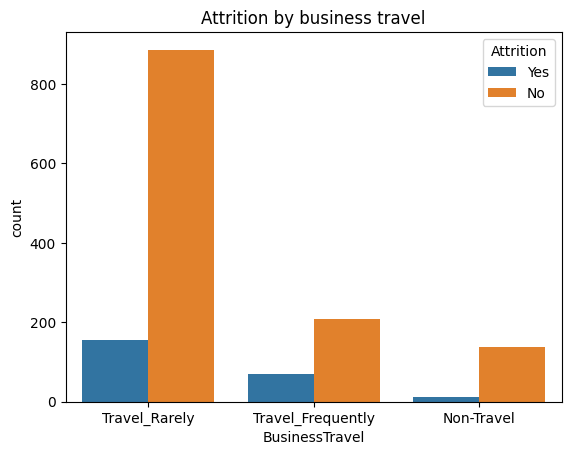

In [10]:

sns.countplot(data=df, x='BusinessTravel', hue='Attrition')
plt.title('Attrition by business travel')
plt.show()

In [ ]:
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title('Attrition by gender')
plt.show()

In [ ]:
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.show()


In [ ]:
sns.countplot(data=df, x='EducationField', hue='Attrition')
plt.title('Attrition by EducationField')
plt.show()




In [ ]:
sns.countplot(data=df, x='MaritalStatus', hue='Attrition')
plt.title('Attrition by MaritalStatus')
plt.show()


In [ ]:
sns.boxplot(data=df, x='Attrition', y='Age')
plt.title('Attrition according to age')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='DailyRate')
plt.title('Attrition according to DailyRate')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='DistanceFromHome')
plt.title('Attrition according to DistanceFromHome')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='Education')
plt.title('Attrition according to Education')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='EmployeeCount')
plt.title('Attrition according to EmployeeCount')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='EmployeeNumber')
plt.title('Attrition according to EmployeeNumber')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='EnvironmentSatisfaction')
plt.title('Attrition according to EnvironmentSatisfaction')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='HourlyRate')
plt.title('Attrition according to HourlyRate')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='JobInvolvement')
plt.title('Attrition according to JobInvolvement')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='JobLevel')
plt.title('Attrition according to JobLevel')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction')
plt.title('Attrition according to JobSatisfaction')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title('Attrition according to MonthlyIncome')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='MonthlyRate')
plt.title('Attrition according to MonthlyRate')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='NumCompaniesWorked')
plt.title('Attrition according to NumCompaniesWorked')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='PercentSalaryHike')
plt.title('Attrition according to PercentSalaryHike')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='PerformanceRating')
plt.title('Attrition according to PerformanceRating')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='RelationshipSatisfaction')
plt.title('Attrition according to RelationshipSatisfaction')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='StandardHours')
plt.title('Attrition according to StandardHours')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='StockOptionLevel')
plt.title('Attrition according to StockOptionLevel')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='TotalWorkingYears')
plt.title('Attrition according to TotalWorkingYears')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='TrainingTimesLastYear')
plt.title('Attrition according to TrainingTimesLastYear')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='WorkLifeBalance')
plt.title('Attrition according to WorkLifeBalance')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='YearsAtCompany')
plt.title('Attrition according to YearsAtCompany')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='YearsInCurrentRole')
plt.title('Attrition according to YearsInCurrentRole')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='YearsSinceLastPromotion')
plt.title('Attrition according to YearsSinceLastPromotion')
plt.show()

In [ ]:
sns.boxplot(data=df, x='Attrition', y='YearsWithCurrManager')
plt.title('Attrition according to YearsWithCurrManager')
plt.show()

Analyse exploratoire visuelle (EDA) -- résult

In [ ]:
#Les colonnes catégorielles :
#'BusinessTravel'
#'Department'
#'EducationField',
#'Gender'
#MaritalStatus:is a factor that may influence attrition.
#Age :is a factor that may influence attrition.
#DailyRate:is a factor that may influence attrition.
#MonthlyIncome:is a factor that may influence attrition.
#YearsWithCurrManager:is a factor that may influence attrition.
 

Statistiquechi² 

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:


table = pd.crosstab(df['BusinessTravel'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"p-value: {p:.8f}")



p-value: 0.00000561


In [ ]:

table = pd.crosstab(df['Department'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"p-value: {p:.8f}")

p-value: 0.00452561


In [ ]:


table = pd.crosstab(df['EducationField'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"p-value: {p:.8f}")

p-value: 0.00677398


In [ ]:


table = pd.crosstab(df['Gender'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"p-value: {p:.8f}")

p-value: 0.29057245


In [ ]:


table = pd.crosstab(df['MaritalStatus'], df['Attrition'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"p-value: {p:.8f}")

p-value: 0.00000000


In [ ]:

contingency_table = pd.crosstab(df['JobRole'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")


p-value: 0.00000000


In [60]:
contingency_table = pd.crosstab(df['YearsWithCurrManager_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")


p-value: 0.00000162


In [61]:
contingency_table = pd.crosstab(df['YearsSinceLastPromotion_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.24597641


In [62]:
contingency_table = pd.crosstab(df['YearsInCurrentRole_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00000001


In [63]:
contingency_table = pd.crosstab(df['YearsAtCompany_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00000000


In [64]:
contingency_table = pd.crosstab(df['WorkLifeBalance_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.04102619


In [65]:

contingency_table = pd.crosstab(df['TrainingTimesLastYear_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.14214275


In [66]:
contingency_table = pd.crosstab(df['TotalWorkingYears_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00000000


In [75]:
contingency_table = pd.crosstab(df['TotalWorkingYears_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00000000


In [76]:
contingency_table = pd.crosstab(df['JobRole'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00000000


In [82]:
contingency_table = pd.crosstab(df['Over18'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 1.00000000


In [89]:
contingency_table = pd.crosstab(df['OverTime'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00000000


In [91]:
contingency_table = pd.crosstab(df['PercentSalaryHike'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.49895522


In [92]:
contingency_table = pd.crosstab(df['PerformanceRating'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.99007455


In [93]:
contingency_table = pd.crosstab(df['RelationshipSatisfaction'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.15497244


In [94]:
contingency_table = pd.crosstab(df['StandardHours'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 1.00000000


In [95]:
contingency_table = pd.crosstab(df['StockOptionLevel'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00000000


In [96]:
contingency_table = pd.crosstab(df['TotalWorkingYears'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00000000


In [97]:
contingency_table = pd.crosstab(df['TrainingTimesLastYear'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.01914773


In [98]:
contingency_table = pd.crosstab(df['WorkLifeBalance'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00097257


In [99]:
contingency_table = pd.crosstab(df['YearsAtCompany'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00000028


In [100]:
contingency_table = pd.crosstab(df['YearsInCurrentRole'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00000041


In [101]:
contingency_table = pd.crosstab(df['YearsSinceLastPromotion'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.11193388


In [102]:
contingency_table = pd.crosstab(df['YearsWithCurrManager'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00000000


In [105]:
contingency_table = pd.crosstab(df['Age_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00000000


In [108]:
contingency_table = pd.crosstab(df['DailyRate_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.07400394


In [109]:
contingency_table = pd.crosstab(df['DistanceFromHome_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.02179351


In [110]:
contingency_table = pd.crosstab(df['Education_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.46981250


In [112]:
contingency_table = pd.crosstab(df['EmployeeNumber_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.41259403


In [113]:
contingency_table = pd.crosstab(df['EnvironmentSatisfaction_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00378462


In [114]:
contingency_table = pd.crosstab(df['HourlyRate_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.60322847


In [115]:
contingency_table = pd.crosstab(df['JobInvolvement_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00015989


In [116]:
contingency_table = pd.crosstab(df['JobLevel_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00015944


In [117]:
contingency_table = pd.crosstab(df['JobSatisfaction_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00137012


In [118]:
contingency_table = pd.crosstab(df['MonthlyIncome_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00000000


In [119]:
contingency_table = pd.crosstab(df['MonthlyRate_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.60164822


In [120]:
contingency_table = pd.crosstab(df['NumCompaniesWorked_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00113428


In [121]:
contingency_table = pd.crosstab(df['PercentSalaryHike_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.43590263


In [122]:
contingency_table = pd.crosstab(df['PerformanceRating_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 1.00000000


In [123]:
contingency_table = pd.crosstab(df['RelationshipSatisfaction_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.43883700


In [125]:
contingency_table = pd.crosstab(df['TotalWorkingYears_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.00000000


In [126]:
contingency_table = pd.crosstab(df['TrainingTimesLastYear_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.14214275


In [129]:
contingency_table = pd.crosstab(df['StockOptionLevel_group'], df['Attrition'])


chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"p-value: {p:.8f}")

p-value: 0.02576729


In [156]:
#The  factors that may influence attrition according to statistic 
#BusinessTravel
#Department
#BusinessTravel
#MaritalStatus
#JobRole
#YearsWithCurrManager_group
#YearsInCurrentRole_group
#YearsAtCompany_group
#WorkLifeBalance_group
#TotalWorkingYears_group
#JobRole
#OverTime
#StockOptionLevel
#TotalWorkingYears
#TrainingTimesLastYear
#WorkLifeBalance
#YearsAtCompany
#YearsInCurrentRole
#YearsWithCurrManager
#Age_group
#DistanceFromHome_group
#EnvironmentSatisfaction_group
#JobInvolvement_group
#JobLevel_group
#JobSatisfaction_group
#MonthlyIncome_group
#NumCompaniesWorked_group
#TotalWorkingYears_group
#Age
#DailyRate
#DistanceFromHome
#Education
#EmployeeCount
#EmployeeNumber
#EnvironmentSatisfaction
#HourlyRate
#JobInvolvement
#JobLevel
#JobSatisfaction
#MonthlyIncome
#NumCompaniesWorked
#EmployeeCount_group


Test t de Student

In [130]:
from scipy.stats import ttest_ind

In [131]:

group_yes = df[df['Attrition'] == 'Yes']['Age']
group_no = df[df['Attrition'] == 'No']['Age']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")


p-value: 0.02576729


In [132]:

group_yes = df[df['Attrition'] == 'Yes']['DailyRate']
group_no = df[df['Attrition'] == 'No']['DailyRate']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

p-value: 0.02576729


In [ ]:
group_yes = df[df['Attrition'] == 'Yes']['DistanceFromHome']
group_no = df[df['Attrition'] == 'No']['DistanceFromHome']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

p-value: 0.02576729


In [135]:
group_yes = df[df['Attrition'] == 'Yes']['Education']
group_no = df[df['Attrition'] == 'No']['Education']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

p-value: 0.02576729


In [136]:
group_yes = df[df['Attrition'] == 'Yes']['EmployeeCount']
group_no = df[df['Attrition'] == 'No']['EmployeeCount']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

p-value: 0.02576729


c:\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [137]:
group_yes = df[df['Attrition'] == 'Yes']['EmployeeNumber']
group_no = df[df['Attrition'] == 'No']['EmployeeNumber']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

p-value: 0.02576729


In [138]:
group_yes = df[df['Attrition'] == 'Yes']['EnvironmentSatisfaction']
group_no = df[df['Attrition'] == 'No']['EnvironmentSatisfaction']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

p-value: 0.02576729


In [139]:
group_yes = df[df['Attrition'] == 'Yes']['HourlyRate']
group_no = df[df['Attrition'] == 'No']['HourlyRate']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

p-value: 0.02576729


In [140]:
group_yes = df[df['Attrition'] == 'Yes']['JobInvolvement']
group_no = df[df['Attrition'] == 'No']['JobInvolvement']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

p-value: 0.02576729


In [141]:
group_yes = df[df['Attrition'] == 'Yes']['JobLevel']
group_no = df[df['Attrition'] == 'No']['JobLevel']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

p-value: 0.02576729


In [142]:
group_yes = df[df['Attrition'] == 'Yes']['JobSatisfaction']
group_no = df[df['Attrition'] == 'No']['JobSatisfaction']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

p-value: 0.02576729


In [143]:
group_yes = df[df['Attrition'] == 'Yes']['MonthlyIncome']
group_no = df[df['Attrition'] == 'No']['MonthlyIncome']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

p-value: 0.02576729


In [ ]:
group_yes = df[df['Attrition'] == 'Yes']['JobSatisfaction']
group_no = df[df['Attrition'] == 'No']['JobSatisfaction']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

In [79]:
group_yes = df[df['Attrition'] == 'Yes']['MonthlyRate']
group_no = df[df['Attrition'] == 'No']['MonthlyRate']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

p-value: 0.00000000


In [144]:
group_yes = df[df['Attrition'] == 'Yes']['NumCompaniesWorked']
group_no = df[df['Attrition'] == 'No']['NumCompaniesWorked']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

p-value: 0.02576729


In [146]:
group_yes = df[df['Attrition'] == 'Yes']['EmployeeCount_group']
group_no = df[df['Attrition'] == 'No']['EmployeeCount_group']
t_stat, p_val = ttest_ind(group_yes, group_no)
print(f"p-value: {p:.8f}")

p-value: 0.02576729


Modelisation decision tree

In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder



In [150]:
# Encodage des variables catégorielles
df_encoded = pd.get_dummies(df, drop_first=True)

# Vérifier que la colonne 'Attrition' est bien binaire (1 = Yes, 0 = No)
df_encoded['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)


In [151]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']


In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Diviser en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modèle
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [157]:
import pandas as pd

importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Afficher les 10 plus importantes
print(importances.head(10))



Attrition_Yes              1.0
DailyRate                  0.0
Age                        0.0
Education                  0.0
EmployeeCount              0.0
EmployeeNumber             0.0
EnvironmentSatisfaction    0.0
HourlyRate                 0.0
JobInvolvement             0.0
JobLevel                   0.0
dtype: float64


<Axes: title={'center': 'Top 10 variables influentes'}>

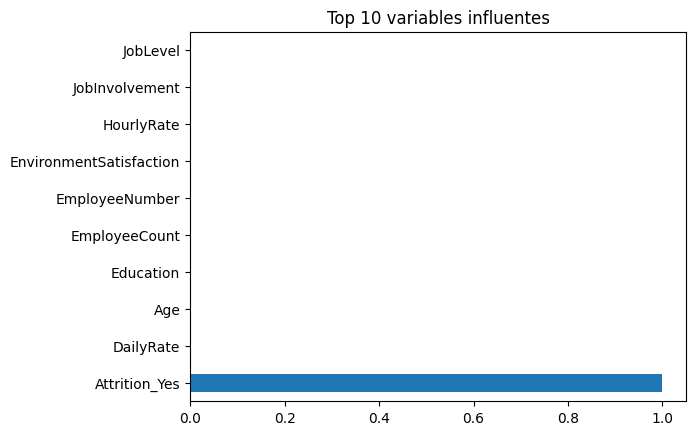

In [159]:
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(10).plot(kind='barh', title="Top 10 variables influentes")


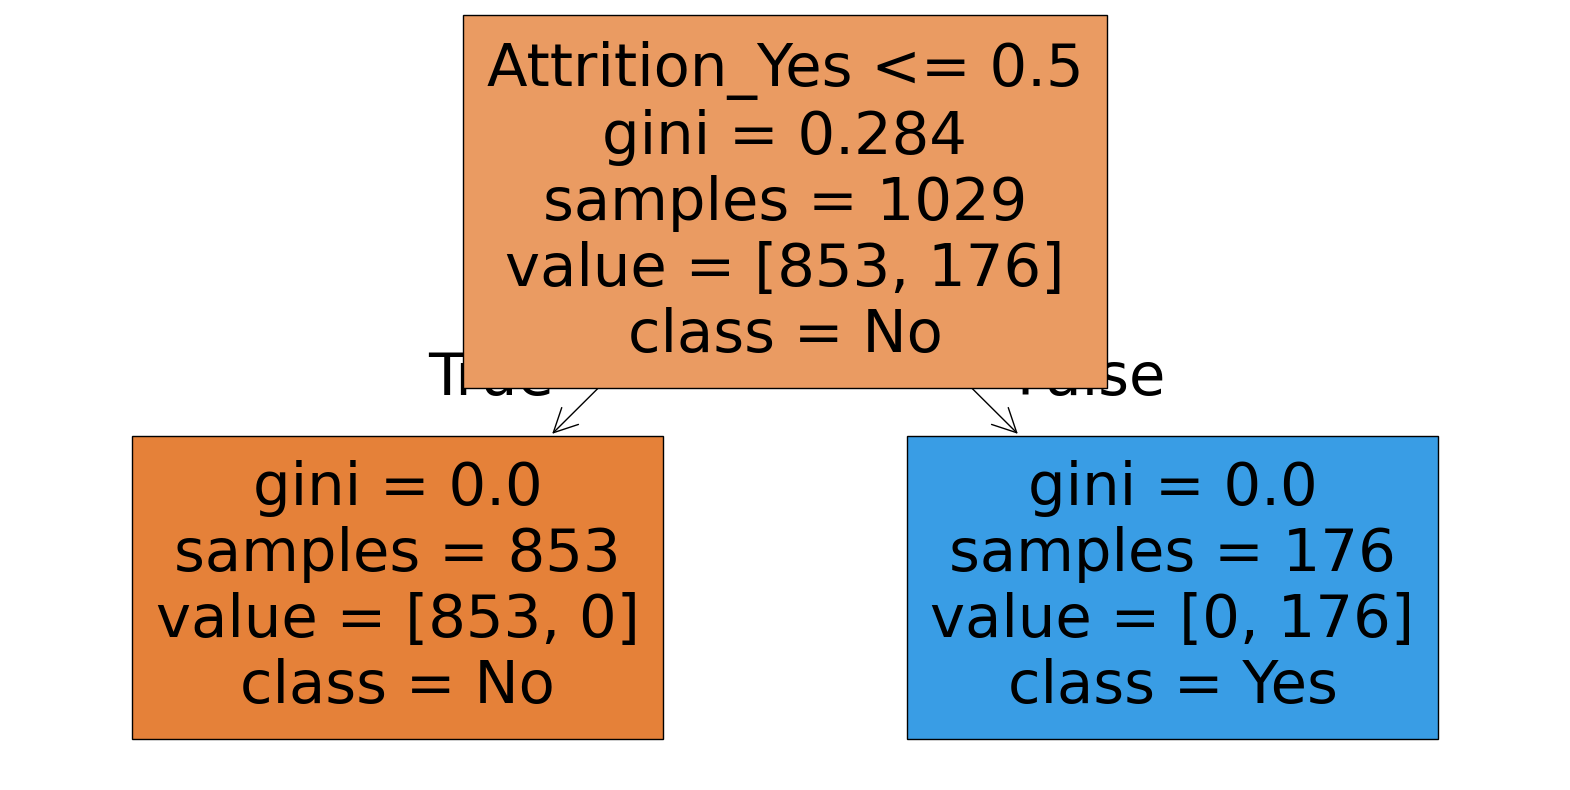

In [160]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


In [161]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y, model.predict(X)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1233
           1       1.00      1.00      1.00       237

    accuracy                           1.00      1470
   macro avg       1.00      1.00      1.00      1470
weighted avg       1.00      1.00      1.00      1470



In [162]:
df['Attrition_Predicted'] = model.predict(X)
print(df[['Attrition', 'Attrition_Predicted']].head())



  Attrition  Attrition_Predicted
0       Yes                    1
1        No                    0
2       Yes                    1
3        No                    0
4        No                    0


C:\Users\harra\AppData\Local\Temp\ipykernel_17556\2879095791.py:44: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", "B", 14)
C:\Users\harra\AppData\Local\Temp\ipykernel_17556\2879095791.py:45: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 10, "Rapport d'Analyse - Attrition", ln=True)
C:\Users\harra\AppData\Local\Temp\ipykernel_17556\2879095791.py:47: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", "", 12)
C:\Users\harra\AppData\Local\Temp\ipykernel_17556\2879095791.py:51: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font("Arial", "B", 12)
C:\Users\harra\AppData\Local\Temp\ipykernel_17556\2879095791.p

✅ Rapport généré : rapport_attrition.pdf


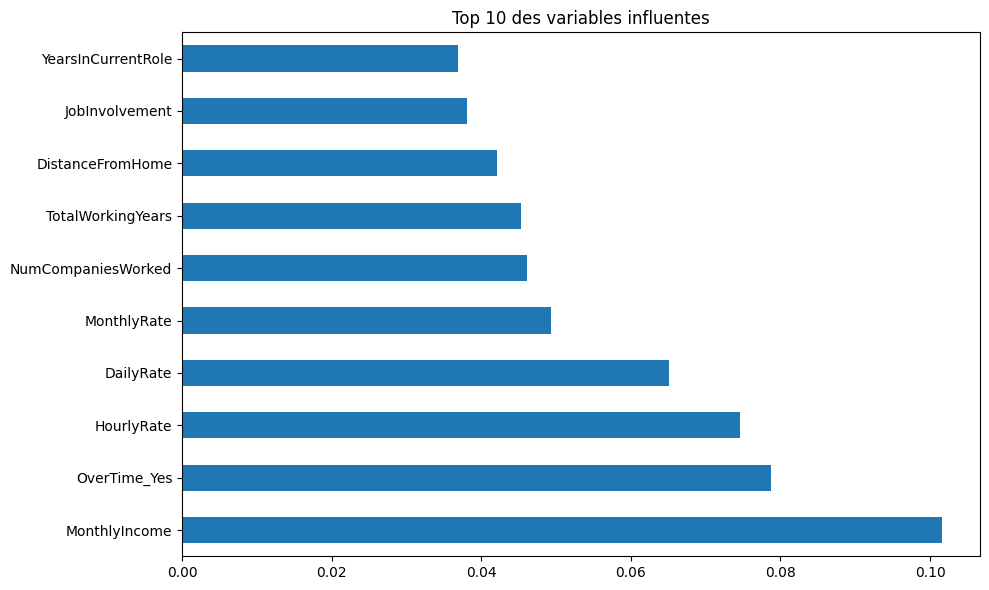

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from fpdf import FPDF

# === Charger tes données ===
df = pd.read_csv("HR-Employee-Attritionnew.csv")  # Remplace par ton dataset

# === Préparation ===
df = df.copy()
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Encodage simple des variables catégorielles
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop("Attrition", axis=1)
y = df_encoded["Attrition"]

# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Modèle Arbre de Décision ===
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Importance des variables
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances.head(10).plot(kind='barh')
plt.title("Top 10 des variables influentes")
plt.tight_layout()
plt.savefig("importance.png")

# Prédictions
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
report_str = classification_report(y_test, y_pred)

# === Génération du PDF ===
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", "B", 14)
pdf.cell(0, 10, "Rapport d'Analyse - Attrition", ln=True)

pdf.set_font("Arial", "", 12)
pdf.multi_cell(0, 10, "Ce rapport présente les résultats d'une analyse visant à prédire l'attrition des employés à partir des données RH disponibles.")

# Classification report
pdf.set_font("Arial", "B", 12)
pdf.cell(0, 10, "Résultats de classification", ln=True)
pdf.set_font("Courier", "", 10)
pdf.multi_cell(0, 5, report_str)

# Image des variables importantes
pdf.add_page()
pdf.set_font("Arial", "B", 12)
pdf.cell(0, 10, "Variables les plus influentes", ln=True)
pdf.image("importance.png", x=10, y=30, w=180)

# Enregistrer le PDF
pdf.output("rapport_attrition.pdf")

print("✅ Rapport généré : rapport_attrition.pdf")


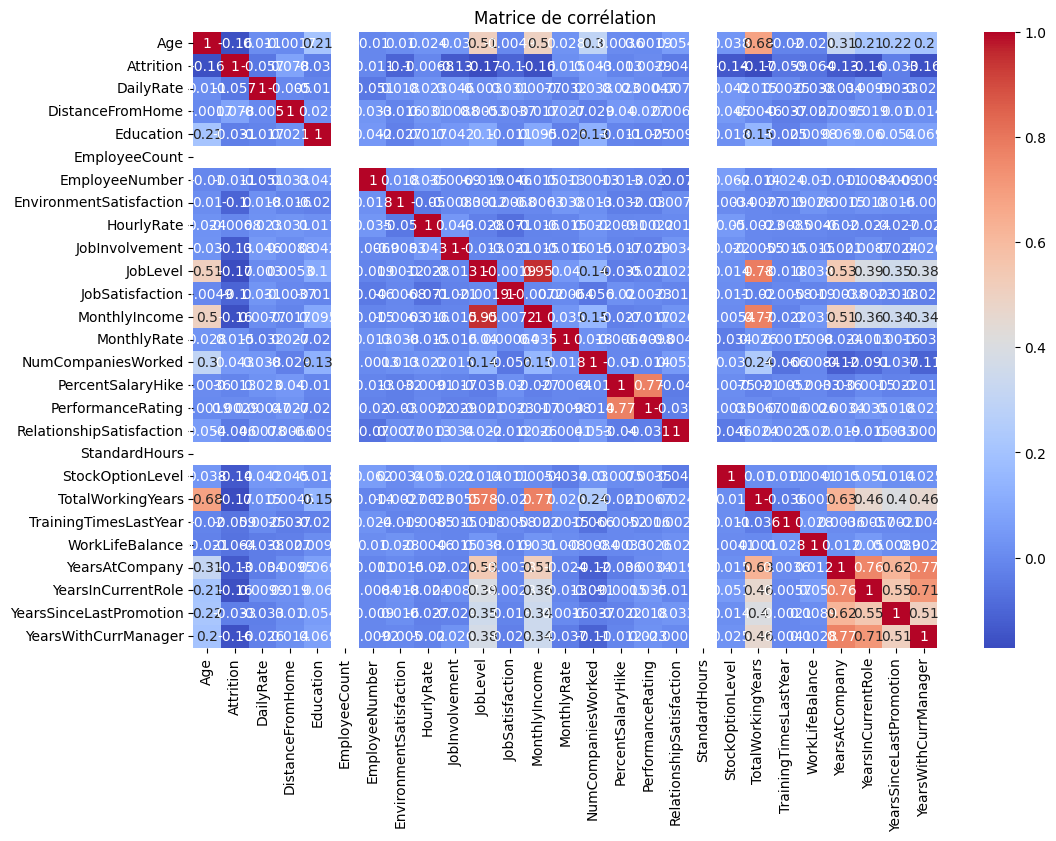

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


In [166]:
df['Attrition'].value_counts(normalize=True)


Attrition
0    0.838776
1    0.161224
Name: proportion, dtype: float64